# Pathway loading in Cytoscape

We wish to create an automated Cytoscape workflow using Python and py4cytoscape in Jupyter notebooks

In order to load our pathway from WikiPathways into Cytoscape, we have a select few prerequisites:

- Downloading and starting a **new** Cytoscape session
- Installing the latest versions of Wikipathways, CyTargetLinker and FileTransfer. 

This can be done via Cytoscape itself by opening Apps > App Manager > Searching for required apps.
- Downloading py4cytoscape

Next, we import the following packages:

In [2]:
import os
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict
import py4cytoscape as p4c
pd.set_option('display.float_format', '{:.6g}'.format)

import warnings
warnings.filterwarnings('ignore')


# Logging Errors

To prevent logging errors from occuring, we run this piece of code to ensurig logging is disabled while using the notebook.

In [3]:
import logging,sys
logging.disable(sys.maxsize)

## Defining Pathway

Once we have imported the following packages, we can make a variable to which we assign the ID of the pathway we wish to visualise in cytoscape. 

In this case, I have assigned WP5035 from WikiPathways to the variable 'WP'

In [4]:
WP = 'WP5035'

## Loading Pathway in Cytoscape

We now will load the pathway assigned to variable 'WP' in cytoscape by running the following piece of code.

In the variable cmd_list we recall all the commands we wish to run in a systematic way. 

Since we wish to load our pathway as a network, we use the command 'import-as-network'. However, if you wish to import it as a pathway, simply replace it to 'import-as-pathway'


In [5]:
cmd_list = ['wikipathways','import-as-network','id=" ', WP, '"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Visualising network in Jupyter Notebook

In order to visualize the output that you get in Cytoscape in the notebook, we need to import IPython and export our network as an image.

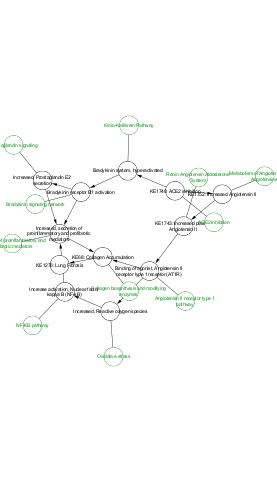

In [6]:
import IPython
p4c.export_image(filename='pathway.png')
p4c.sandbox_get_from('pathway.png')
from IPython.display import Image
Image('pathway.png')

## Network extension

Before we begin to extend our network using the linkset and CyTargetLinker, we have to identify the path where we have stored it. Ensure that all files needed for the visualisation and analysis are present in the folder.

In [7]:
path = 'C:/Users/Aria Jadhav/Documents/GitHub/2021-internship/Aria-Notebooks/'

linkset = path + 'wikipathways-hsa-20210512-REACTOME.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 1',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 85',
 'Added nodes: 85']

In [8]:
linkset = path + 'wikipathways-hsa-20210512-WIKIPATHWAYS.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 2',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 125',
 'Added nodes: 109']

In [9]:
linkset = path + 'wikipathways-hsa-20210525-STUDENT.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 3',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 345',
 'Added nodes: 278']

We can visualize our Cytoscape output by running the same piece of code as before and changing the file name

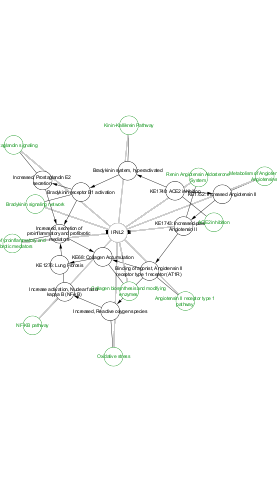

In [10]:
p4c.export_image(filename='extended_network.png')
p4c.sandbox_get_from('extended_network.png')
from IPython.display import Image
Image('extended_network.png')

## Loading and Applying Visual Style

To improve the readability of the nodes in the network, we can load a visual style file saved in the path as mentioned before.

In [11]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

['Loaded styles:', 'CyTargetLinker']

 Next, we can apply this style using the following piece of code

In [12]:
setVisualStyle = 'vizmap apply styles="CyTargetLinker"'
p4c.commands.commands_get(setVisualStyle)

['Style applied to views:',
 'CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens (SUID: 259)']

In [13]:
p4c.layout_network()

{}

We get the following output after applying the visual style

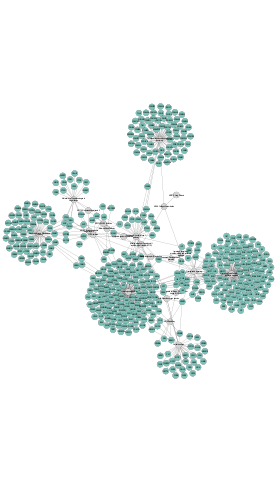

In [14]:
p4c.export_image(filename='extended_net_viz.png')
p4c.sandbox_get_from('extended_net_viz.png')
Image('extended_net_viz.png')

# Loading data expression values
We next load a file containing calculations such as: log2FC, P value, FDR, etc to our network in Cytoscape by loading it as a dataframe

In [15]:
dataExpr = pd.read_csv(r'C:/Users/Aria Jadhav/Documents/GitHub/2021-internship/Aria-Notebooks/dataExpr.csv')
dataExpr

,Name,log2FC,logCPM,F,PValue,FDR
0,SAA2,2.41427,5.4325,512.091,1.41e-12,1.88e-08
1,CCL20,3.13368,4.94906,447.918,3.56e-12,2.38e-08
2,IL36G,2.72231,4.35905,340.455,2.36e-11,1.05e-07
3,INHBA,1.81056,6.51144,272.793,1.07e-10,3.58e-07
4,TNFAIP3,1.60191,7.41858,263.427,1.36e-10,3.63e-07
...,...,...,...,...,...,...
13345,ZNF490,0.000134518,2.99404,6.67e-07,0.99936,0.999557
13346,NCKAP5L,0.000134274,4.88638,6.2e-07,0.999383,0.999557
13347,FBXO24,-0.00052419,-0.670124,5.71e-07,0.999408,0.999557
13348,IQCD,-2.58e-05,0.0101403,3.57e-07,0.999532,0.999606


In [16]:
p4c.load_table_data(dataExpr, data_key_column="Name")

'Success: Data loaded in defaultnode table'

We then retreive a list of all the column names in the node table of Cytoscape so that we do not make errors while recalling their names while coding.

In [17]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'Type',
 'XrefId',
 'XrefDatasource',
 'Color',
 'Border Width',
 'Node Size',
 'Label Font Size',
 'Ensembl',
 'CTL.Ext',
 'CTL.Type',
 'CTL.PathwayName',
 'CTL.label',
 'CTL.PathwayID',
 'CTL.GeneName',
 'CTL.GeneID',
 'log2FC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

# Visualisation
To visualise our expression data, we can first make a volcano plot. It shows the general distribution of differentially expressed genes in our dataset. It can give us a good idea about how these results might translate into our AOP network. Make sure that you first install bioinfokit before running this section of the code.

In [53]:
from bioinfokit import analys, visuz
dataExpr.head()

,Name,log2FC,logCPM,F,PValue,FDR
0,SAA2,2.41427,5.4325,512.091,1.41e-12,1.88e-08
1,CCL20,3.13368,4.94906,447.918,3.56e-12,2.38e-08
2,IL36G,2.72231,4.35905,340.455,2.36e-11,1.05e-07
3,INHBA,1.81056,6.51144,272.793,1.07e-10,3.58e-07
4,TNFAIP3,1.60191,7.41858,263.427,1.36e-10,3.63e-07


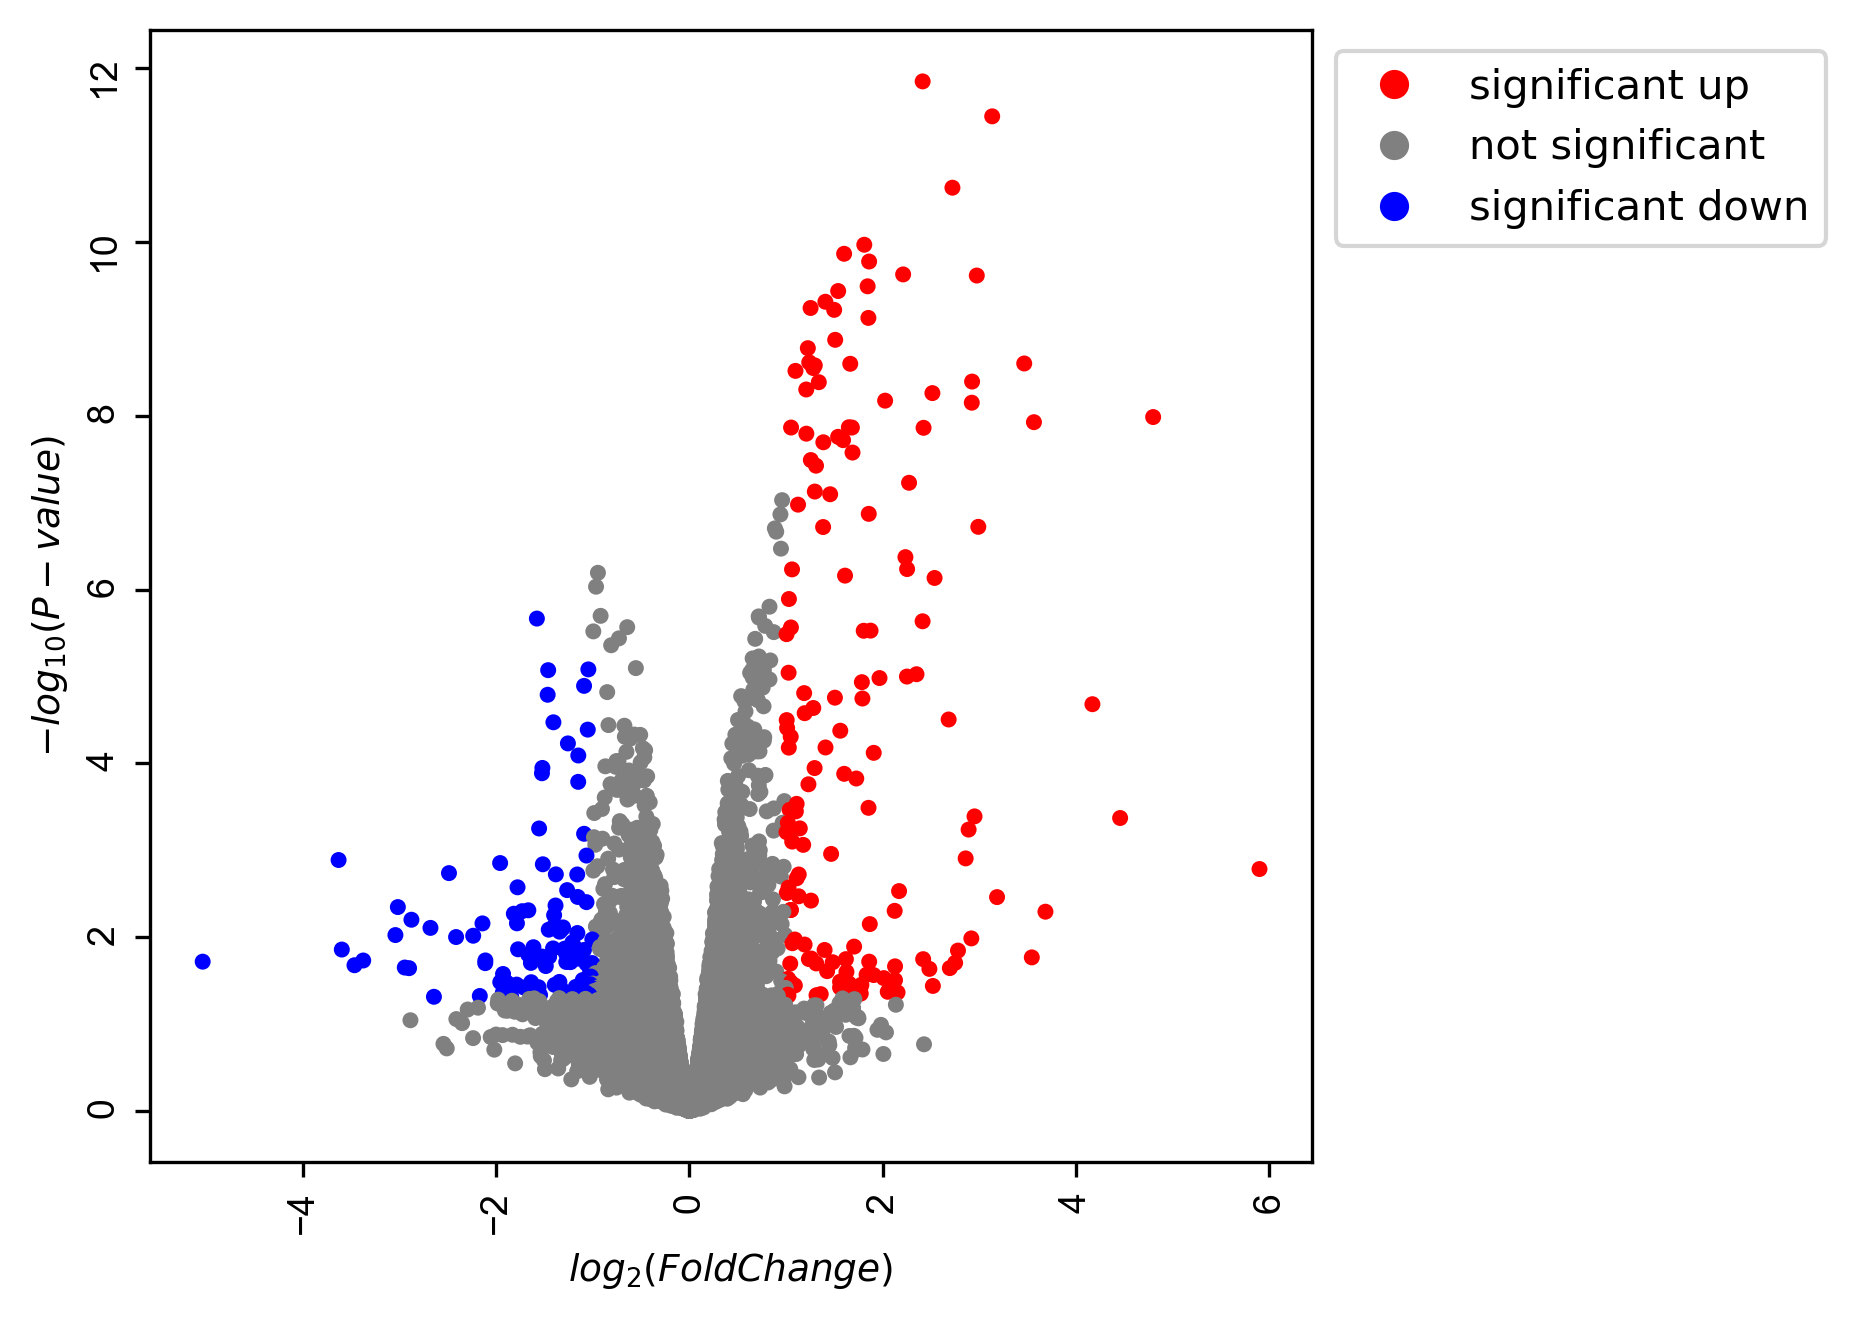

In [19]:
visuz.gene_exp.volcano(df=dataExpr, lfc='log2FC', pv='PValue',color=("#FF0000", "grey", "#0000FF"), plotlegend=True, legendpos='upper right', legendanchor=(1.46,1))
Image('volcano.png')

To visualise our expression data on Cytoscape, we first deal with our log2FC values.

In [50]:
log2FC_score_table = p4c.get_table_columns(table='node', columns='log2FC')
log2FC_score_table

,log2FC
1116,0.08784
1122,0.0909537
1124,0.0983981
1126,-0.126064
1128,0.0714252
...,...
809,0.497568
811,0.166133
821,0.125969
823,-0.049557


We then set our minimum, maximum and centre log2FC values. In this case, to avoid our data being skewed, we took an upper and lower limit of +1 and -1 respectively. However, you can use the code mentioned as a comment to find the minimum, maximum and centre log2FC values of your data.

Next, we used the function 'set_node_color_mapping' to allocate colours and a style to these predetermined log2FC values.

In [21]:
#log2FC_min = log2FC_score_table.min().values[0]
#log2FC_max = log2FC_score_table.max().values[0]
#log2FC_center = log2FC_min + (log2FC_max - log2FC_min)/2
log2FC_min = -1
log2FC_max = 1
log2FC_center = 0
p4c.set_visual_style('CyTargetLinker')

p4c.set_node_color_mapping('log2FC', [log2FC_min, log2FC_center, log2FC_max], ['#0000FF', '#FFFFFF', '#FF0000'], style_name = 'CyTargetLinker')

''

## P Value
Next, we visualise the P values. Here, a P value < 0.05 is considered to be significant. Since we changed the node colours to depict the log2FC values, we can change the node width and colour to represent P value significance. This can be done by altering the widths in the 'set_node_border_width_mapping' function.

In [22]:
p4c.set_node_border_width_default(5, style_name='CyTargetLinker')

''

We filter for significant genes using the column filter function and show the data frame as a list so that we can visualise it on cytoscape.

In [23]:
Sig_gene = p4c.create_column_filter('Sig_gene', 'PValue', 0.05, "LESS_THAN")
Sig_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['PLD2',
  'CLCA4',
  'MARCKS',
  'HSPB1',
  'TRPM7',
  'GNAI1',
  'SQSTM1',
  'ASS1',
  'PLAT',
  'MAPK3',
  'MMP9',
  'TGFBR2',
  'SMAD3',
  'MAP2K1',
  'IL6',
  'MMP13',
  'RAC1',
  'PTGS2',
  'IL1B',
  'TNF',
  'MYLK',
  'PLCB4',
  'DUSP5',
  'SRC',
  'CSF3',
  'PPIB',
  'TUBB3',
  'IL33',
  'VEGFA',
  'COL12A1',
  'LIF',
  'CXCL5',
  'CXCL16',
  'CXCL14',
  'CES1',
  'MME',
  'ATP6AP2',
  'TLL1',
  'VEGFC',
  'CSF1',
  'MAP2K6',
  'COL8A1',
  'TLL2',
  'MAP2K2',
  'MMP1',
  'CTGF',
  'IL1A',
  'KCNMA1',
  'ANXA1',
  'P2RY2',
  'IL15',
  'CXCL1',
  'CCL20',
  'IL23A',
  'CSF2',
  'IL1RN',
  'IL17C',
  'IL36G',
  'CXCL10',
  'CXCL2',
  'CXCL6',
  'PTGES',
  'CXCL3',
  'IRF7',
  'CCL28',
  'CALML3',
  'CALML3',
  'CALML3',
  'CAMK2D',
  'CAMK2D',
  'IL36A',
  'ITPR3',
  'ITPR1',
  'ITPR1',
  'ITPR3',
  'ATF4',
  'NFKBIA',
  'NFKB1',
  'NFKBIE',
  'NFE2L2',
  'MAPK10',
  'SOD2',
  'GCLC',
  'CAT',
  'MAOA',
  'GPX3',
  'XDH',
  'MT1X',
  'GSR',
  'NFIX'],
 'edges': None}

In [51]:
df = pd.DataFrame(Sig_gene)
df

,nodes,edges
0,PLD2,None
1,CLCA4,None
2,MARCKS,None
3,HSPB1,None
4,TRPM7,None
...,...,...
85,GPX3,None
86,XDH,None
87,MT1X,None
88,GSR,None


In [25]:
sig_gene_exp_list = df['nodes'].tolist()
print(f"\nsig_gene_exp_list:\n{sig_gene_exp_list}\ntype:{type(sig_gene_exp_list)}")


sig_gene_exp_list:
['PLD2', 'CLCA4', 'MARCKS', 'HSPB1', 'TRPM7', 'GNAI1', 'SQSTM1', 'ASS1', 'PLAT', 'MAPK3', 'MMP9', 'TGFBR2', 'SMAD3', 'MAP2K1', 'IL6', 'MMP13', 'RAC1', 'PTGS2', 'IL1B', 'TNF', 'MYLK', 'PLCB4', 'DUSP5', 'SRC', 'CSF3', 'PPIB', 'TUBB3', 'IL33', 'VEGFA', 'COL12A1', 'LIF', 'CXCL5', 'CXCL16', 'CXCL14', 'CES1', 'MME', 'ATP6AP2', 'TLL1', 'VEGFC', 'CSF1', 'MAP2K6', 'COL8A1', 'TLL2', 'MAP2K2', 'MMP1', 'CTGF', 'IL1A', 'KCNMA1', 'ANXA1', 'P2RY2', 'IL15', 'CXCL1', 'CCL20', 'IL23A', 'CSF2', 'IL1RN', 'IL17C', 'IL36G', 'CXCL10', 'CXCL2', 'CXCL6', 'PTGES', 'CXCL3', 'IRF7', 'CCL28', 'CALML3', 'CALML3', 'CALML3', 'CAMK2D', 'CAMK2D', 'IL36A', 'ITPR3', 'ITPR1', 'ITPR1', 'ITPR3', 'ATF4', 'NFKBIA', 'NFKB1', 'NFKBIE', 'NFE2L2', 'MAPK10', 'SOD2', 'GCLC', 'CAT', 'MAOA', 'GPX3', 'XDH', 'MT1X', 'GSR', 'NFIX']
type:<class 'list'>


Here, we set the node border width and border colour since we only want the significant genes to have an altered border width and colour.

In [26]:
p4c.set_node_border_color_bypass(sig_gene_exp_list, "#00FF2A")
p4c.set_node_border_width_bypass(sig_gene_exp_list, 15)

''

In [27]:
p4c.layout_network('force-directed')

{}

We can now retreive the image of our network on Cytoscape.

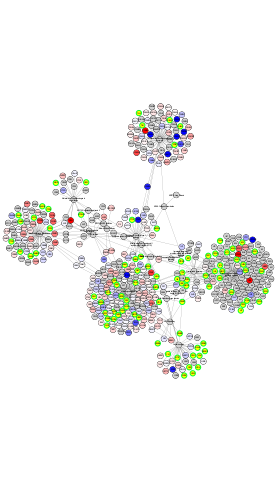

In [28]:
p4c.export_image(filename='data_net_viz.png', resolution=600)
p4c.sandbox_get_from('data_net_viz.png')
from IPython.display import Image
Image('data_net_viz.png')


# Filtering Empty Nodes
There are some genes that do not have a log2FC value. In order to clear up the network to improve readability, it is better if we identify these nodes and remove them from the network. We first identify the maximum and minimum log2FC values of the dataExpr table. Then, we create a column filter that filters the nodes that fall out of this range.

In [29]:
log2FC_min_filter = log2FC_score_table.min().values[0]
log2FC_max_filter = log2FC_score_table.max().values[0]

print(log2FC_min_filter)
print(log2FC_max_filter)

-1.666293947
4.798713519


Since we now know the minimum and maximum log2FC values, we can filter for the nodes that fall out of this range. We can do this either by using the exact log2FC values, or by simply selecting integers that fall outside of the log2FC range. In this case, the log2FC cutoffs are -2 and 5.

In [30]:
log2FCfilter= p4c.create_column_filter('log2FCfilter', 'log2FC', [-2,5], "IS_NOT_BETWEEN")
log2FCfilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['SLC1A6',
  'CHRM4',
  'PRKCB',
  'TRPM8',
  'KCNN2',
  'CHRM1',
  'TRPC4',
  'MLC1',
  'TRPC3',
  'TRPA1',
  'Overview of proinflammatory and profibrotic mediators',
  'CLDN5',
  'Kinin-Kallikrein Pathway',
  'Increased, Prostaglandin E2 secretion',
  'ACE2 inhibition',
  'Angiotensin II receptor type 1 pathway',
  'P2RY12',
  'Binding of agonist, Angiotensin II receptor type 1 receptor (AT1R)',
  'Collagen biosynthesis and modifying enzymes',
  'IL10',
  'KE1276: Lung Fibrosis',
  'KE68: Collagen Accumulation',
  'KE1743: Increased plasma Angiotensin II',
  'KE1752: Increased Angiotensin II',
  'NF-KB pathway',
  'Oxidative stress',
  'KE1740: ACE2 inhibition',
  'Bradykinin system, hyperactivated',
  'Renin Angiotensin Aldosterone System',
  'Increased, Reactive oxygen species',
  'Metabolism of Angiotensinogen to Angiotensins',
  'Increase activation, Nuclear factor kappa B (NF-kB)',
  'Increased, secretion of proinflammatory and profibrotic mediators',
  'Bradykinin rec

We can see in the output above that the Key Event (KE) nodes of our AOP have also been selected, which is not what we want. So, we create a second filter to identity just the genes in the CTL.Type column of the node table.

In [31]:
CTLfilter = p4c.create_column_filter('CTLfilter', 'CTL.Type', "gene", "IS")
CTLfilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['JUN',
  'SLC1A6',
  'CHRM4',
  'GNB1',
  'CYP2J2',
  'MAPK9',
  'PXN',
  'PLD2',
  'MAPK8',
  'MAPT',
  'RUNX2',
  'RASA2',
  'ITGA2',
  'CDH1',
  'PRKCB',
  'CLCA4',
  'NGF',
  'PRKCA',
  'GNG2',
  'MARCKS',
  'HSPB1',
  'TRPM7',
  'RAF1',
  'GNAI1',
  'TRPM8',
  'SQSTM1',
  'KCNN2',
  'FRS2',
  'SMAD2',
  'RHOA',
  'VIM',
  'MAP1LC3A',
  'KDR',
  'ASS1',
  'CHRM1',
  'PLAT',
  'CASP3',
  'CTNNB1',
  'TRPC4',
  'PLCG1',
  'MAPK3',
  'MMP9',
  'MTOR',
  'MLC1',
  'MMP2',
  'TRPC6',
  'BECN1',
  'TRPC3',
  'HRAS',
  'P2RX5',
  'TIMP1',
  'PRKD1',
  'ELK1',
  'PLCB3',
  'NOS1',
  'TRPA1',
  'TGFBR2',
  'GJA1',
  'CLDN5',
  'OSCAR',
  'P2RY12',
  'IL10',
  'SMAD3',
  'PANX1',
  'ACTA2',
  'TRPV1',
  'MAP2K1',
  'IL6',
  'GFAP',
  'TRPC1',
  'MMP13',
  'P2RX7',
  'CASP9',
  'RAC1',
  'PTGS2',
  'SMAD7',
  'GSK3B',
  'GNAS',
  'ROCK1',
  'SP7',
  'PRKCH',
  'PIK3CA',
  'CHRM3',
  'PLA2G4A',
  'TNFRSF11B',
  'CCR2',
  'IL17F',
  'IL1B',
  'TNF',
  'PTK2',
  'CASP1',
  'MAPK1',
  

Now, we can combine both these filters to only select the **genes** with no log2FC values in the network by creating a composite filter titled 'final_filter'.

In [32]:
final_filter = p4c.create_composite_filter('final_filter', ['log2FCfilter', 'CTLfilter'])
final_filter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['SLC1A6',
  'CHRM4',
  'PRKCB',
  'TRPM8',
  'KCNN2',
  'CHRM1',
  'TRPC4',
  'MLC1',
  'TRPC3',
  'TRPA1',
  'CLDN5',
  'P2RY12',
  'IL10',
  'GFAP',
  'P2RX7',
  'SP7',
  'TNFRSF11B',
  'CCR2',
  'IL17F',
  'BGLAP',
  'CXCL8',
  'COL3A1',
  'ACAN',
  'NEUROD1',
  'IFNA2',
  'COL11A1',
  'CCL11',
  'RACK1',
  'COL9A1',
  'ADAMTS2',
  'IL25',
  'COL2A1',
  'IFNW1',
  'CCL21',
  'COL10A1',
  'COL26A1',
  'IL4',
  'COL25A1',
  'COL15A1',
  'COL14A1',
  'NEUROG1',
  'COL19A1',
  'CHRM2',
  'P3H1',
  'IFNB1',
  'P3H2',
  'COLGALT1',
  'IL21',
  'COL9A3',
  'AGT',
  'XCL2',
  'CMA1',
  'CPB2',
  'CCL2',
  'IL17B',
  'CTSG',
  'IFNG',
  'GZMH',
  'IFNA21',
  'COL24A1',
  'MMP8',
  'IFNA4',
  'IL13',
  'P3H3',
  'COLGALT2',
  'COL6A6',
  'COL6A5',
  'COL20A1',
  'CPN1',
  'KLKB1',
  'CPB1',
  'CPA3',
  'ENPEP',
  'PLA2G2A',
  'CCL3',
  'CCL23',
  'CXCL9',
  'IL7',
  'CCL15',
  'CCL17',
  'IL12B',
  'IL5',
  'IL17A',
  'IL20',
  'IL27',
  'CNTF',
  'CCL13',
  'LTA',
  'CCL1',
  'IL3

Next, we can delete the nodes highlighted in yellow on cytoscape, since they have no useful information.

In [33]:
p4c.delete_selected_nodes()

{'nodes': [1318,
  781,
  779,
  386,
  1646,
  360,
  336,
  1671,
  1565,
  1678,
  1737,
  370,
  400,
  1526,
  1439,
  352,
  1409,
  1403,
  1576,
  711,
  1685,
  1344,
  472,
  1707,
  404,
  1169,
  1467,
  450,
  1535,
  1294,
  1185,
  1664,
  1587,
  1567,
  1669,
  1537,
  456,
  1486,
  794,
  1145,
  1553,
  1574,
  1265,
  835,
  1675,
  1648,
  1641,
  1212,
  1715,
  1539,
  1628,
  1606,
  1322,
  1240,
  1299,
  328,
  1696,
  1165,
  1434,
  1547,
  707,
  880,
  438,
  1600,
  1367,
  1596,
  783,
  364,
  420,
  1508,
  1709,
  1378,
  1726,
  1416,
  1120,
  1194,
  878,
  1515,
  1731,
  1490,
  340,
  378,
  1604,
  1520,
  394,
  1624,
  1356,
  1713,
  422,
  452,
  705,
  658,
  1569,
  1611,
  312,
  1445,
  1230,
  1563,
  1350,
  474,
  1729,
  476,
  1651,
  1236,
  376,
  721,
  1593,
  691,
  825,
  1118,
  1284,
  1602,
  870,
  1411,
  1465,
  1609,
  1580,
  1637,
  673,
  460,
  390,
  1634,
  1296,
  689,
  382,
  709,
  1549,
  701,
  796,
  650

In [34]:
p4c.layout_network()

{}

We can now visualise out AOP network without the empty data nodes.

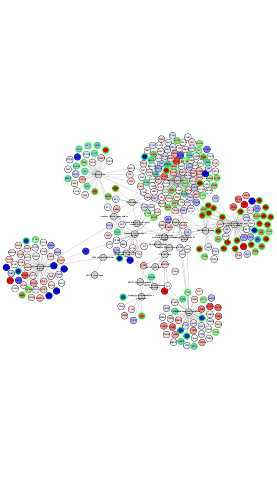

In [35]:
p4c.export_image(filename='delnode_net_viz.png')
p4c.sandbox_get_from('delnode_net_viz.png')
Image('delnode_net_viz.png')

# Removing unwanted KEs

For the purpose of this research, we only look at the pathways were bradykinin and prostaglandin are involved for fibrosis. Due to this, we can remove all the KE nodes that arent relevant for our analysis. These include pathways relating to Angiotensin II, Reactive Oxygen Species (ROS) and NFkB.

In [36]:
AngioFilter= p4c.create_column_filter('AngioFilter', 'name', 'Angiotensin', "CONTAINS")
AngioFilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['Angiotensin II receptor type 1 pathway',
  'Binding of agonist, Angiotensin II receptor type 1 receptor (AT1R)',
  'KE1743: Increased plasma Angiotensin II',
  'KE1752: Increased Angiotensin II',
  'Renin Angiotensin Aldosterone System',
  'Metabolism of Angiotensinogen to Angiotensins'],
 'edges': None}

In [37]:
p4c.delete_selected_nodes()

{'nodes': [228, 215, 226, 216, 220, 221],
 'edges': [751,
  240,
  753,
  241,
  1394,
  242,
  243,
  756,
  758,
  247,
  760,
  762,
  764,
  766,
  1408,
  768,
  770,
  1413,
  774,
  776,
  777,
  778,
  1419,
  399,
  1424,
  786,
  1428,
  789,
  407,
  409,
  1433,
  793,
  411,
  1436,
  413,
  415,
  799,
  417,
  1442,
  419,
  678,
  1448,
  680,
  425,
  682,
  684,
  1453,
  686,
  688,
  1459,
  694,
  1464,
  696,
  698,
  700,
  1470,
  704,
  1475,
  1353,
  1482,
  714,
  716,
  718,
  720,
  1364,
  726,
  1495,
  728,
  1498,
  730,
  732,
  734,
  479,
  736,
  1377,
  738,
  740,
  742,
  744,
  1386,
  746,
  235,
  236,
  1389,
  749,
  237]}

In [38]:
ROSFilter= p4c.create_column_filter('ROSFilter', 'name', 'oxidative stress', "CONTAINS")
ROSFilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['Oxidative stress'], 'edges': None}

In [39]:
p4c.delete_selected_nodes()

{'nodes': [223],
 'edges': [818,
  820,
  245,
  822,
  824,
  828,
  830,
  832,
  834,
  838,
  840,
  842,
  844,
  846,
  847,
  849,
  851,
  853,
  855,
  857,
  859,
  861,
  863,
  865,
  867,
  869,
  873,
  875,
  877]}

In [40]:
ROS2Filter= p4c.create_column_filter('ROS2Filter', 'name', 'oxygen', "CONTAINS")
ROS2Filter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['Increased, Reactive oxygen species'], 'edges': None}

In [41]:
p4c.delete_selected_nodes()

{'nodes': [227], 'edges': [251]}

In [42]:
NFkBFilter= p4c.create_column_filter('NFkBFilter', 'name', 'NF-', "CONTAINS")
NFkBFilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['NF-KB pathway',
  'Increase activation, Nuclear factor kappa B (NF-kB)'],
 'edges': None}

In [43]:
p4c.delete_selected_nodes()

{'nodes': [229, 222],
 'edges': [816, 802, 244, 804, 806, 808, 810, 252, 812, 814]}

In [44]:
p4c.layout_network()

{}

# Delete unconnected nodes

As a result of deleting the KE nodes and their edges, several gene nodes were left unconnected and are thus not required to be analysed for the research. Through this series of steps, we can clear them out of our network.

In [45]:
p4c.select_all_edges()

[1519,
 1523,
 1529,
 1531,
 1533,
 1534,
 1542,
 1544,
 1546,
 1552,
 1556,
 1558,
 1562,
 1571,
 1579,
 1584,
 1589,
 1592,
 1595,
 1618,
 1620,
 1622,
 1623,
 1627,
 1117,
 1630,
 1632,
 1633,
 1123,
 1636,
 1125,
 1127,
 1639,
 1640,
 1129,
 1130,
 1643,
 1132,
 1645,
 1134,
 1136,
 1138,
 1140,
 1653,
 1142,
 1655,
 1144,
 1660,
 1148,
 1150,
 1662,
 1663,
 1152,
 1154,
 1156,
 1668,
 1158,
 1160,
 1674,
 1162,
 1164,
 653,
 654,
 1168,
 656,
 1682,
 1172,
 1174,
 662,
 663,
 1688,
 1176,
 665,
 1178,
 1691,
 667,
 1692,
 1180,
 1182,
 670,
 671,
 1695,
 1184,
 1699,
 1188,
 1702,
 1190,
 1191,
 1193,
 1706,
 1197,
 1199,
 1712,
 1201,
 1203,
 1718,
 1207,
 1209,
 1211,
 1724,
 1215,
 1728,
 1217,
 1219,
 1221,
 1734,
 1223,
 1224,
 1226,
 1228,
 1229,
 1233,
 1235,
 1239,
 1245,
 1247,
 1249,
 1252,
 1254,
 1256,
 1257,
 234,
 1261,
 238,
 1262,
 239,
 1264,
 1267,
 1269,
 246,
 1271,
 248,
 249,
 1273,
 250,
 1275,
 1276,
 253,
 254,
 1278,
 1279,
 255,
 256,
 1281,
 257,
 258,


In [46]:
p4c.select_nodes_connected_by_selected_edges()

{'nodes': [1522,
  1528,
  1530,
  1532,
  1541,
  1543,
  1545,
  1551,
  1555,
  1557,
  1561,
  1578,
  1583,
  1617,
  1619,
  1621,
  1626,
  1116,
  1631,
  1122,
  1124,
  1126,
  1128,
  1131,
  1644,
  1133,
  1135,
  1137,
  1139,
  1141,
  1654,
  1143,
  1659,
  1147,
  1661,
  1149,
  1151,
  1153,
  1155,
  1667,
  1157,
  1159,
  1161,
  1673,
  1163,
  652,
  1167,
  655,
  1171,
  1173,
  661,
  1687,
  1175,
  664,
  1177,
  666,
  1690,
  1179,
  1181,
  1183,
  1698,
  1187,
  1701,
  1189,
  1192,
  1705,
  1196,
  1198,
  1711,
  1200,
  1202,
  1717,
  1206,
  1208,
  1210,
  1723,
  1214,
  1216,
  1218,
  1220,
  1733,
  1222,
  1225,
  1227,
  1232,
  1234,
  211,
  212,
  213,
  214,
  1238,
  727,
  217,
  218,
  219,
  1244,
  1246,
  1248,
  224,
  225,
  1251,
  739,
  1253,
  741,
  230,
  1255,
  231,
  232,
  233,
  1260,
  1263,
  1268,
  1270,
  1272,
  1274,
  1277,
  1280,
  1282,
  1286,
  1288,
  1290,
  1292,
  1301,
  1303,
  1305,
  1307,
  13

In [47]:
p4c.invert_node_selection()

{'nodes': [752,
  755,
  757,
  759,
  761,
  763,
  765,
  1407,
  767,
  769,
  773,
  775,
  1418,
  398,
  785,
  1427,
  788,
  1432,
  792,
  412,
  798,
  414,
  416,
  418,
  803,
  677,
  1447,
  807,
  679,
  681,
  683,
  813,
  685,
  815,
  687,
  817,
  1458,
  819,
  693,
  1463,
  695,
  697,
  827,
  699,
  1469,
  829,
  831,
  703,
  837,
  839,
  1352,
  841,
  713,
  843,
  715,
  845,
  717,
  719,
  848,
  850,
  1363,
  852,
  725,
  1494,
  854,
  856,
  729,
  858,
  731,
  860,
  733,
  862,
  478,
  735,
  864,
  737,
  866,
  868,
  743,
  872,
  745,
  874,
  876,
  748,
  750],
 'edges': [1519,
  1523,
  1529,
  1531,
  1533,
  1534,
  1542,
  1544,
  1546,
  1552,
  1556,
  1558,
  1562,
  1571,
  1579,
  1584,
  1589,
  1592,
  1595,
  1618,
  1620,
  1622,
  1623,
  1627,
  1117,
  1630,
  1632,
  1633,
  1123,
  1636,
  1125,
  1127,
  1639,
  1640,
  1129,
  1130,
  1643,
  1132,
  1645,
  1134,
  1136,
  1138,
  1140,
  1653,
  1142,
  1655,
  1144,

In [48]:
p4c.delete_selected_nodes()

{'nodes': [719,
  852,
  1418,
  839,
  478,
  815,
  697,
  1352,
  763,
  845,
  807,
  412,
  788,
  757,
  792,
  785,
  866,
  831,
  414,
  1469,
  874,
  860,
  755,
  725,
  765,
  743,
  1463,
  864,
  687,
  854,
  737,
  803,
  418,
  1363,
  848,
  717,
  858,
  733,
  775,
  798,
  761,
  731,
  745,
  1494,
  693,
  819,
  752,
  416,
  1447,
  683,
  876,
  685,
  868,
  1407,
  677,
  715,
  750,
  817,
  735,
  827,
  769,
  695,
  398,
  767,
  837,
  713,
  699,
  850,
  1432,
  862,
  1458,
  829,
  679,
  773,
  843,
  681,
  759,
  748,
  729,
  703,
  841,
  872,
  813,
  856,
  1427],
 'edges': []}

Finally, we can visualise our filtered and formatted AOP network.

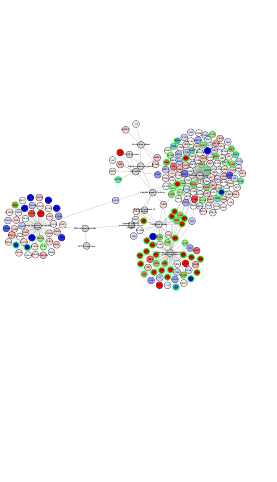

In [49]:
p4c.export_image(filename='finalAOP.png')
p4c.sandbox_get_from('finalAOP.png')
Image('finalAOP.png')

# Results
For prostaglandin signalling, out of the 19 gene nodes, 12 are significant.

For Proinflammatory and profibrotic mediators, 29 genes are significant out of 49

Out of 8, 1 gene is significant (AT6AP2) in ACE2 inhibition

5 genes out of 46 are significant for Collagen biosynthesis KE

None for Bradykinin Receptor B1 activation and kinin kallikrein

First, we create a list of the total list of genes and the final resultant significant genes in our network before looking into the total and significant genes of each KE. We then calculate the enrichment score and the hypergeometric test.

## Step 1: Calculate total number of genes in network

In [49]:
CTLfilter_gene = p4c.create_column_filter('CTLfilter_gene', 'CTL.Type', "gene", "IS")
CTLfilter_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['CXCL1',
  'CCL20',
  'IL19',
  'AREG',
  'IL23A',
  'CSF2',
  'IL1RN',
  'IL17C',
  'IL36G',
  'CXCL10',
  'PYCARD',
  'CCL22',
  'PTGER4',
  'JUN',
  'TNFSF13B',
  'GNB1',
  'CYP2J2',
  'MAPK9',
  'PXN',
  'PLD2',
  'CXCL2',
  'MAPK8',
  'MAPT',
  'RUNX2',
  'RASA2',
  'ITGA2',
  'CXCL6',
  'CDH1',
  'PTGES',
  'CLCA4',
  'CXCL3',
  'NGF',
  'PRKCA',
  'GNG2',
  'CCL5',
  'MARCKS',
  'HSPB1',
  'TRPM7',
  'IRF7',
  'RAF1',
  'GNAI1',
  'TGFB1',
  'SQSTM1',
  'BDKRB1',
  'FRS2',
  'SMAD2',
  'NOS3',
  'CTF1',
  'RHOA',
  'NR3C2',
  'VIM',
  'CCL28',
  'BDKRB2',
  'MAP1LC3A',
  'KDR',
  'ASS1',
  'AHR',
  'PLAT',
  'CCL26',
  'CASP3',
  'CTNNB1',
  'CXCL11',
  'PLCG1',
  'MAPK3',
  'MMP3',
  'MMP9',
  'MTOR',
  'IL36RN',
  'MMP2',
  'TRPC6',
  'BECN1',
  'IL36A',
  'HRAS',
  'P2RX5',
  'TIMP1',
  'PRKD1',
  'CX3CL1',
  'ELK1',
  'PLCB3',
  'NOS1',
  'TGFBR2',
  'GJA1',
  'OSCAR',
  'GNAQ',
  'SMAD3',
  'PANX1',
  'ACTA2',
  'TRPV1',
  'CALM1',
  'MAP2K1',
  'CREB1',
  'IL6',

In [50]:
final_gene_df = pd.DataFrame(CTLfilter_gene)
final_gene_list = final_gene_df['nodes'].tolist()
p4c.get_selected_node_count()

223

In [51]:
N = len(final_gene_list)
print('Total number of genes (N) are:', N)

Total number of genes (N) are: 223


## Step 2: Calculate all significant genes in network

In [52]:
final_sig_gene = p4c.create_column_filter('final_sig_gene', 'PValue', 0.05, "LESS_THAN")
final_sig_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['CXCL1',
  'CCL20',
  'IL23A',
  'CSF2',
  'IL1RN',
  'IL17C',
  'IL36G',
  'CXCL10',
  'PLD2',
  'CXCL2',
  'CXCL6',
  'PTGES',
  'CLCA4',
  'CXCL3',
  'MARCKS',
  'HSPB1',
  'TRPM7',
  'IRF7',
  'GNAI1',
  'SQSTM1',
  'CCL28',
  'ASS1',
  'PLAT',
  'MAPK3',
  'MMP9',
  'IL36A',
  'TGFBR2',
  'SMAD3',
  'MAP2K1',
  'IL6',
  'MMP13',
  'RAC1',
  'PTGS2',
  'IL1B',
  'TNF',
  'NFKB1',
  'MYLK',
  'PLCB4',
  'DUSP5',
  'SRC',
  'CSF3',
  'PPIB',
  'TUBB3',
  'IL33',
  'VEGFA',
  'COL12A1',
  'LIF',
  'CXCL5',
  'CXCL16',
  'CXCL14',
  'ATP6AP2',
  'TLL1',
  'VEGFC',
  'CSF1',
  'COL8A1',
  'TLL2',
  'MAP2K2',
  'MMP1',
  'IL1A',
  'KCNMA1',
  'ANXA1',
  'P2RY2',
  'IL15'],
 'edges': None}

In [53]:
final_sig_gene_df = pd.DataFrame(final_sig_gene)
final_sig_gene_list = final_sig_gene_df['nodes'].tolist()

In [54]:
p4c.get_selected_node_count()

63

In [55]:
n = len(final_sig_gene_list)
print('Total significant genes (n) are:', n)

Total significant genes (n) are: 63


## Step 3-4: Calculate total number of genes and significant genes for each KE

In [97]:
# ACE2 inhibition, Bradykinin signaling network, Prostaglandin signaling, Collagen biosynthesis and modifying enzymes, Overview of proinflammatory and profibrotic mediators

KE_gene = p4c.get_first_neighbors('Overview of proinflammatory and profibrotic mediators', as_nested_list = False)
KE_gene

['CX3CL1',
 'TGFB1',
 'IL36A',
 'IL36RN',
 'MMP3',
 'CXCL11',
 'CCL26',
 'CCL28',
 'CTF1',
 'CCL5',
 'CXCL3',
 'CXCL6',
 'CXCL2',
 'TNFSF13B',
 'CCL22',
 'CXCL10',
 'TNF',
 'IL11',
 'VEGFA',
 'IL36G',
 'IL17C',
 'SPP1',
 'IL1RN',
 'CSF2',
 'IL23A',
 'AREG',
 'IL19',
 'CCL20',
 'CXCL1',
 'IL15',
 'TNFSF13',
 'NFKB1',
 'MMP9',
 'IL1B',
 'IL1A',
 'IL12A',
 'MMP1',
 'PPBP',
 'CSF1',
 'IL18',
 'IL6',
 'CXCL14',
 'CXCL16',
 'CXCL5',
 'LIF',
 'CXCL17',
 'IL33',
 'TSLP',
 'CSF3',
 'Increased, secretion of proinflammatory and profibrotic mediators']

We then convert the resultant set of nodes to a list

In [98]:
KE_gene_df = pd.DataFrame(KE_gene, columns =['O'])
KE_gene_df

,O
0,CX3CL1
1,TGFB1
2,IL36A
3,IL36RN
4,MMP3
5,CXCL11
6,CCL26
7,CCL28
8,CTF1
9,CCL5


In [99]:
KE_gene_list = KE_gene_df['O'].tolist()
KE_gene_list

['CX3CL1',
 'TGFB1',
 'IL36A',
 'IL36RN',
 'MMP3',
 'CXCL11',
 'CCL26',
 'CCL28',
 'CTF1',
 'CCL5',
 'CXCL3',
 'CXCL6',
 'CXCL2',
 'TNFSF13B',
 'CCL22',
 'CXCL10',
 'TNF',
 'IL11',
 'VEGFA',
 'IL36G',
 'IL17C',
 'SPP1',
 'IL1RN',
 'CSF2',
 'IL23A',
 'AREG',
 'IL19',
 'CCL20',
 'CXCL1',
 'IL15',
 'TNFSF13',
 'NFKB1',
 'MMP9',
 'IL1B',
 'IL1A',
 'IL12A',
 'MMP1',
 'PPBP',
 'CSF1',
 'IL18',
 'IL6',
 'CXCL14',
 'CXCL16',
 'CXCL5',
 'LIF',
 'CXCL17',
 'IL33',
 'TSLP',
 'CSF3',
 'Increased, secretion of proinflammatory and profibrotic mediators']

In [100]:
B = len(KE_gene_list)-1
print('Total genes linked to KE (B) are:', B)

Total genes linked to KE (B) are: 49


To find the total number of significant genes in the KE, we list all the genes common between the final significant gene list and the KE

In [101]:
sig_gene_in_KE = list(set(final_sig_gene_list) & set(KE_gene_list))
sig_gene_in_KE

['CSF2',
 'IL33',
 'IL1RN',
 'IL1B',
 'CXCL16',
 'CXCL14',
 'IL17C',
 'IL36G',
 'CSF1',
 'CSF3',
 'IL6',
 'TNF',
 'CXCL2',
 'CXCL6',
 'CXCL1',
 'IL15',
 'CCL20',
 'CXCL3',
 'NFKB1',
 'LIF',
 'MMP1',
 'VEGFA',
 'IL36A',
 'MMP9',
 'IL23A',
 'CXCL5',
 'CXCL10',
 'CCL28',
 'IL1A']

In [102]:
b = len(sig_gene_in_KE)
print('Significant genes linked to KE (b) is:', b)

Significant genes linked to KE (b) is: 29


Total no of genes (N)
Total significant genes (n)
Total genes linked to specific KE (B)
Total significant genes linked to specific KE (b)

In [103]:
#Calculating the enrichment score for each KE
(b/n) / (B/N)

2.0949141561386457

In [104]:
from scipy.stats import hypergeom
pval = hypergeom.sf(b-1, N, n, B)
print(pval)

2.029797034881729e-07
